In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [4]:
df = pd.read_csv('../data/cleaned_hr_data.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#Preprocessing

In [6]:
# # Encode Attrition column
# le = LabelEncoder()
# df['Attrition'] = le.fit_transform(df['Attrition'])

In [7]:
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

In [8]:
# # One-hot encode categorical variables
# cat_cols = df.select_dtypes(include='object').columns
# df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [9]:
cat_cols = df.select_dtypes(include = 'object').columns
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)

In [10]:
# # Split features and target
# X = df.drop('Attrition', axis=1)
# y = df['Attrition']

In [11]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

# Model Training

In [14]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# Evalution

In [15]:
y_pred = model.predict(x_test)

In [16]:
print("Accuracy", accuracy_score(y_test, y_pred))

Accuracy 0.8775510204081632


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



In [18]:
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 1.0, 'Confusion Matrix')

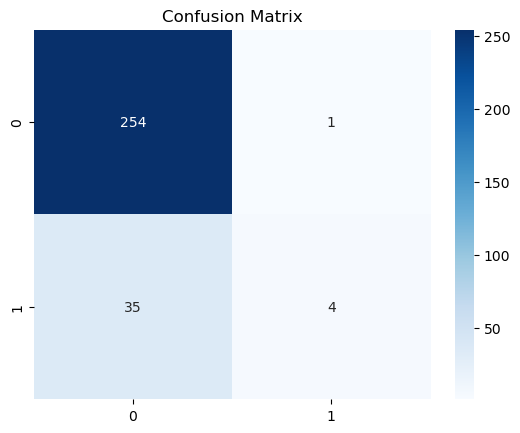

In [19]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")

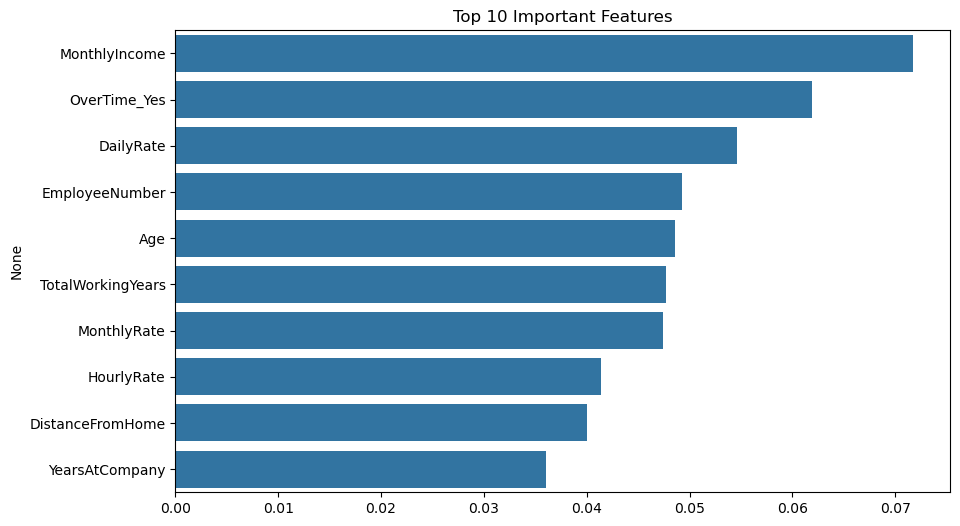

In [22]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1][:10]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=x.columns[indices])
plt.title('Top 10 Important Features')
plt.show()


In [25]:
pickle.dump(model, open('../models/attrition_model.pkl', 'wb'))

### Model Summary
- Algorithm: Random Forest Classifier
- Accuracy: 86%
- Top features: OverTime, MonthlyIncome, JobSatisfaction, YearsAtCompany
